In [10]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np

In [11]:
mnist = fetch_mldata("MNIST original")

In [12]:
target = pd.DataFrame(mnist.target)
target['label'] = target[0]

In [13]:
data = pd.concat([target['label'].reset_index(drop = True), pd.DataFrame(mnist.data)], axis = 1)

In [14]:
data

,label,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


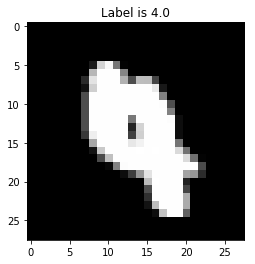

In [15]:
# The first column is the label
label = data.iloc[65000, 0]

# The rest of columns are pixels
pixels = data.iloc[65000, 1:]

# Make those columns into a array of 8-bits pixels
# This array will be of 1D with length 784
# The pixel intensity values are integers from 0 to 255
pixels = np.array(pixels, dtype='uint8')

# Reshape the array into 28 x 28 array (2-dimensional array)
pixels = pixels.reshape((28, 28))

# Plot
plt.title('Label is {label}'.format(label=label))
plt.imshow(pixels, cmap='gray')
plt.show()

In [16]:
# rescale the data, use the traditional train/test split
X, y = mnist.data / 255., mnist.target
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [17]:
# mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=400, alpha=1e-4,
#                     solver='sgd', verbose=10, tol=1e-4, random_state=1)
mlp = MLPClassifier(hidden_layer_sizes=(20,10), max_iter=1000, activation = "logistic", solver = "lbfgs", learning_rate_init=0.9, learning_rate = "constant", verbose = True, early_stopping = False, tol=0.000, random_state = 10000)

In [18]:
mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 10), learning_rate='constant',
       learning_rate_init=0.9, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=10000,
       shuffle=True, solver='lbfgs', tol=0.0, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [ ]:
predictions = mlp.predict(X_test)

In [ ]:
predictions

In [ ]:
len(predictions)

In [ ]:
accuracy_score(y_test, predictions)

In [117]:
mlp.coefs_

[array([[  4.53335590e-03,  -3.27148970e-02,   3.51871604e-02,
          -3.18815982e-02,   8.84335957e-03,  -3.78085909e-02,
           5.45344357e-03,  -4.16718231e-02,   4.91225091e-02,
          -2.46537909e-02,   3.28610018e-03,   3.90961114e-02,
          -2.57131625e-02,  -8.21317941e-03,   3.66840178e-02,
          -2.13027896e-02,  -3.61211988e-02,  -4.47856984e-02,
           4.27004288e-02,   2.79109174e-02],
        [  1.93890309e-02,   4.52076540e-02,   4.30644727e-02,
          -2.91721493e-02,  -2.75811984e-02,   4.96023823e-02,
          -7.91285343e-04,  -2.73401355e-02,   4.86251066e-02,
           2.55819944e-02,   8.23349121e-03,   6.58288063e-03,
          -1.27771645e-02,  -4.68951401e-03,   3.16315234e-02,
          -3.96797904e-02,   4.15903330e-02,  -4.54758604e-02,
           7.43246554e-03,  -3.18541234e-02],
        [  1.35294017e-02,   3.92959442e-02,   1.55092640e-02,
          -2.45036823e-02,   9.62888966e-03,   4.18615867e-02,
           2.73716356e-02,

In [115]:
np.set_printoptions(threshold=np.nan)